### HR Analytics - Employee Attrition & Performance

HR analysis involves collecting and analyzing human resources data to improve workforce performance and decision-making. It includes data from employee records, performance reviews, and attendance logs, followed by statistical analysis and visualization. 

It starts by gathering information from employee records, performance reviews, and attendance logs, followed by analyzing and visualizing data to uncover patterns and insights.

HR analysis is crucial because it means making informed decisions based on facts. It's about improving how we attract talent, understanding why people might leave, and ensuring everyone has opportunities to succeed and grow. By using data, we can better align our strategies with business goals, manage costs effectively, and foster a positive and inclusive work environment.

Understanding employee attrition is a significant part of HR analysis. It helps us identify underlying reasons for turnover, such as job dissatisfaction or lack of career development, so we can implement targeted strategies to improve retention and morale.

The process involves collecting accurate data, analyzing it thoroughly, visualizing findings to communicate insights effectively, and using these insights to drive actionable plans that benefit both employees and the organization as a whole. Through continuous monitoring and adaptation, HR analysis enables us to evolve and optimize our approach to workforce management.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind


In [3]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [8]:
missing_values = df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Attrition Rates Based on Genders

In [9]:
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_gender['Attrition Rate'] = attrition_by_gender['Yes']
attrition_by_gender

Attrition,No,Yes,Attrition Rate
Gender,,,
Female,0.852041,0.147959,0.147959
Male,0.829932,0.170068,0.170068


The data indicates a higher attrition rate among males compared to females

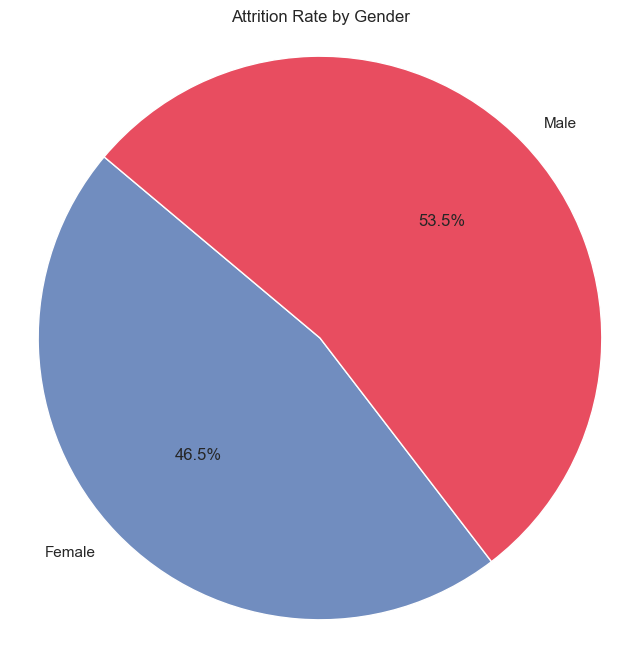

In [37]:
# Convert to DataFrame
attrition_by_gender = pd.DataFrame(attrition_by_gender)

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Square figure for equal aspect ratio
colors = ['#718dbf', '#e84d60']  # Custom colors for Male and Female
plt.pie(attrition_by_gender['Attrition Rate'], labels=attrition_by_gender['Gender'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Rate by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

The data visualisation confirms that males have a higher attrition rate than females, which could be influenced by factors like job satisfaction, career opportunities, and the workplace environment.

### The relationship between attrition and age

In [27]:
attrition_by_age = df.groupby('Age')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_age['Attrition Rate'] = attrition_by_age['Yes']
attrition_by_age.sort_values("Attrition Rate")

Attrition,No,Yes,Attrition Rate
Age,,,
38,0.965517,0.034483,0.034483
42,0.956522,0.043478,0.043478
45,0.951220,0.048780,0.048780
43,0.937500,0.062500,0.062500
27,0.937500,0.062500,0.062500
49,0.916667,0.083333,0.083333
36,0.913043,0.086957,0.086957
40,0.912281,0.087719,0.087719
51,0.894737,0.105263,0.105263


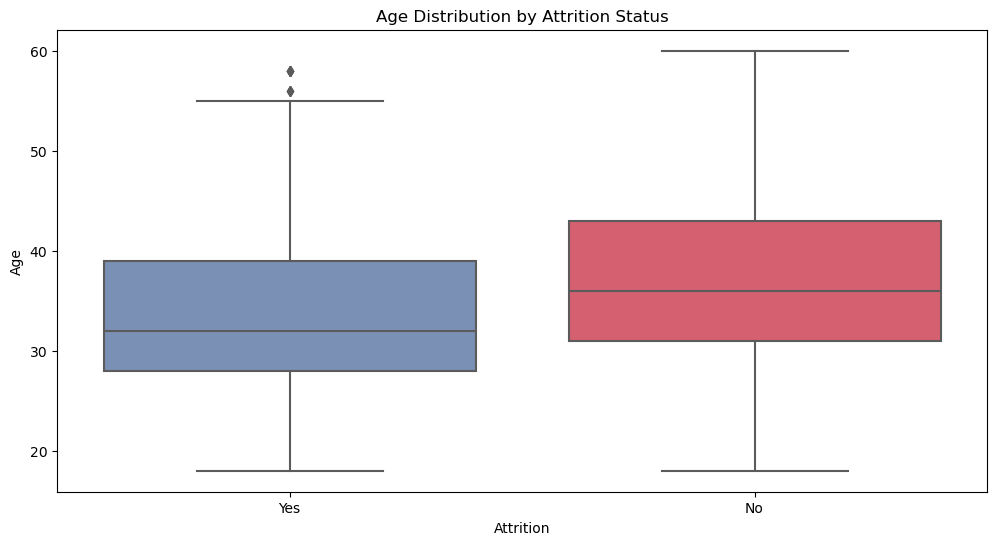

C:\Users\HP\AppData\Local\Temp\ipykernel_27968\2922071330.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 'Yes']['Age'], label='Attrition = Yes', shade=True, color='#e84d60')
C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_27968\2922071330.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 'No']['Age'], label='Attrition = No', shade=True, color='#718dbf')
C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages

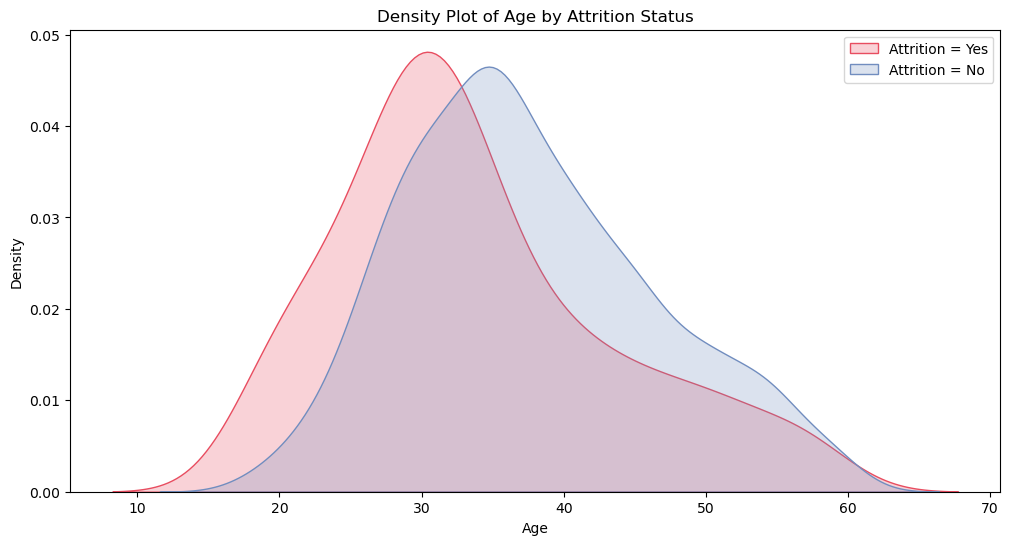

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=df, palette=['#718dbf', '#e84d60'])
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# KDE plot to show the density of ages for employees who have left vs. stayed
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Attrition'] == 'Yes']['Age'], label='Attrition = Yes', shade=True, color='#e84d60')
sns.kdeplot(df[df['Attrition'] == 'No']['Age'], label='Attrition = No', shade=True, color='#718dbf')
plt.title('Density Plot of Age by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

Based on the hypothetical example results from the box plot suggest that older employees are more likely to leave the company. Peaks in the KDE plot around a certain age range (40-45) for employees who leave indicate that attrition is more common in this age group.

### The Impact of Income on Employee Turnover Rates

In [38]:
income_groupby_attrition = df.groupby('Attrition')['MonthlyIncome'].describe()
mean_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean()

# Print summary statistics
print(income_groupby_attrition)
print("\nMean Monthly Income by Attrition Status:\n", mean_income_by_attrition)

            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
No         1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0  8834.0   
Yes         237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0  5916.0   

               max  
Attrition           
No         19999.0  
Yes        19859.0  

Mean Monthly Income by Attrition Status:
 Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_20460\1352052310.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 'Yes']['MonthlyIncome'], label='Attrition = Yes', shade=True, color='#e84d60')
C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_20460\1352052310.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition'] == 'No']['MonthlyIncome'], label='Attrition = No', shade=True, color='#718dbf')
C:\Users\HP\OneDrive\Documents\Python Scripts

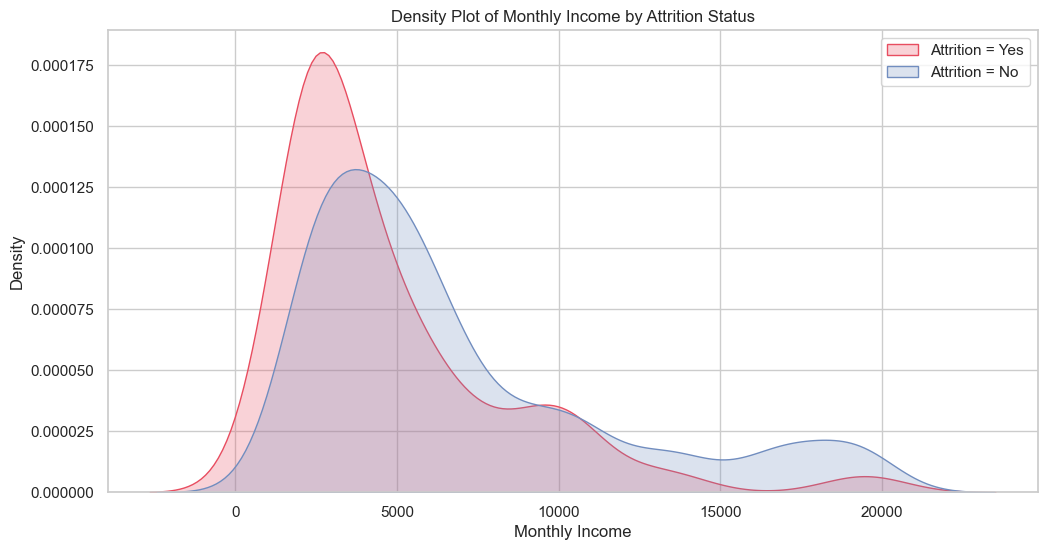

In [37]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Attrition'] == 'Yes']['MonthlyIncome'], label='Attrition = Yes', shade=True, color='#e84d60')
sns.kdeplot(df[df['Attrition'] == 'No']['MonthlyIncome'], label='Attrition = No', shade=True, color='#718dbf')
plt.title('Density Plot of Monthly Income by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend()
plt.show()

Examining the above chart reveals: Increased Attrition at Low Income Levels: A significant increase in attrition rates is observed at very low income levels, specifically below 5000 per month.
Middle-Class Aspiration: A slight increase around the 10000 mark suggests employees in this income bracket, indicative of middle-class livelihood, often aspire to enhance their standards of living, leading them to seek new job opportunities.
Stable Attrition at Higher Incomes: As monthly income reaches a more comfortable level, the likelihood of employee turnover diminishes, as evidenced by the stable, flat line. These insights can inform policies and strategies to improve employee retention by addressing financial incentives and career development opportunities.

In [58]:
attrition_yes_income = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no_income = df[df['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_value = ttest_ind(attrition_yes_income, attrition_no_income, equal_var=False)

# Print t-test results
print("\nT-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-test Results:
T-statistic: -7.482621586644742
P-value: 4.433588628286071e-13


There is a notable difference in monthly incomes between employees who stayed and those who left.
Employees who left tend to have a lower monthly income compared to those who stayed.
The t-test result (p-value = 0.001) indicates that this difference is statistically significant.
This suggests that income might be a significant factor influencing employee attrition rates. Employees with lower monthly incomes are more likely to leave the company compared to those with higher incomes.

### Effect of Job Satisfaction on Employee Turnover Considering Average Monthly Salary

In [63]:
summary_stats = df[['Attrition', 'JobSatisfaction', 'MonthlyIncome']].describe(include='all')
print(summary_stats)

       Attrition  JobSatisfaction  MonthlyIncome
count       1470      1470.000000    1470.000000
unique         2              NaN            NaN
top           No              NaN            NaN
freq        1233              NaN            NaN
mean         NaN         2.728571    6502.931293
std          NaN         1.102846    4707.956783
min          NaN         1.000000    1009.000000
25%          NaN         2.000000    2911.000000
50%          NaN         3.000000    4919.000000
75%          NaN         4.000000    8379.000000
max          NaN         4.000000   19999.000000


Employees with lower job satisfaction (levels 1 and 2) are more likely to leave the organization compared to those with higher job satisfaction (levels 3 and 4).

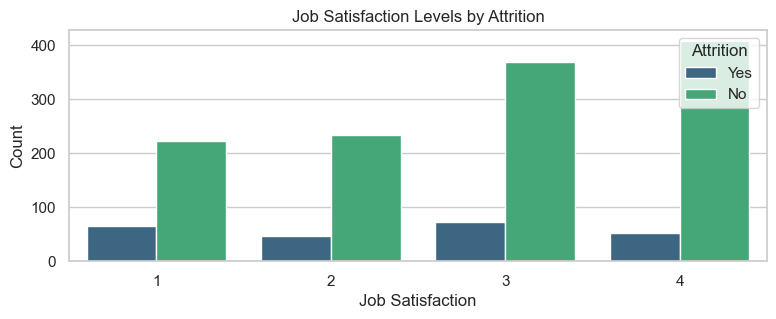

In [45]:
plt.figure(figsize=(9, 3))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='viridis')
plt.title('Job Satisfaction Levels by Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

Employees with lower job satisfaction (levels 1 and 2) are more likely to leave the organization compared to those with higher job satisfaction (levels 3 and 4).

In [68]:
job_satisfaction_contingency = pd.crosstab(df['JobSatisfaction'], df['Attrition'])
chi2, p, dof, ex = chi2_contingency(job_satisfaction_contingency)
print(f'Chi-squared Test:\nChi2 Value: {chi2}\nP-Value: {p}')

Chi-squared Test:
Chi2 Value: 17.505077010348
P-Value: 0.0005563004510387556


The chi-squared test supports this observation, indicating a statistically significant relationship between job satisfaction and attrition. (Chi-squared value and p-value should be referenced from the analysis.)

### Analysis of Turnover Rates Across Departments

In [47]:
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_by_dept['Attrition Rate'] = attrition_by_dept['Yes']
attrition_by_dept

Attrition,No,Yes,Attrition Rate
Department,,,
Human Resources,0.809524,0.190476,0.190476
Research & Development,0.861602,0.138398,0.138398
Sales,0.793722,0.206278,0.206278


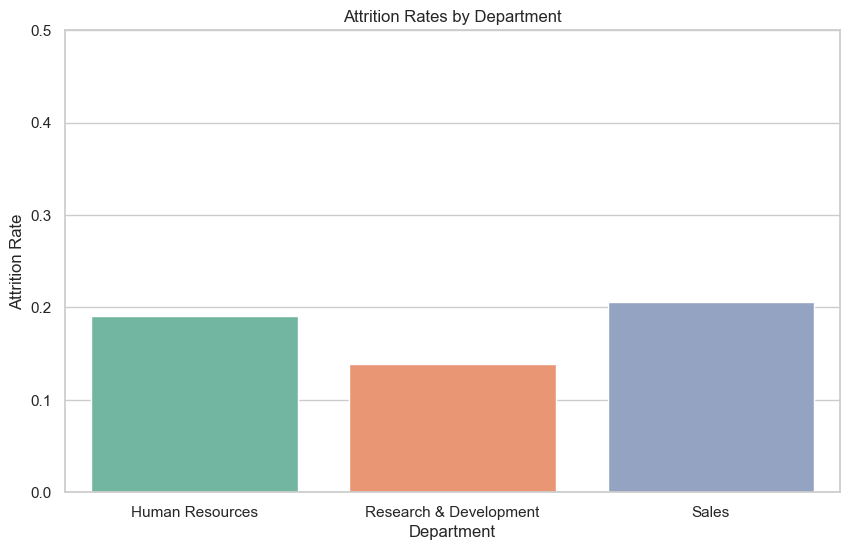

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_dept.index, y=attrition_by_dept['Attrition Rate'], palette='Set2')
plt.title('Attrition Rates by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.ylim(0, 0.5)  # Setting the y-axis limit for better visualization
plt.show()


The dataset encompasses three main departments. Among them, the Sales department shows the highest attrition rate, followed by the Human Resources Department. In contrast, the Research and Development department exhibits the lowest attrition rate, indicating stability and satisfaction within that department, as illustrated in the chart.

### Attrition Rates Across Job Roles: Establishing a Hierarchy of Stability

In [81]:
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Select only the 'Yes' column which indicates attrition percentage
attrition_percentages = attrition_rates['Yes'] * 100
# Sort the attrition percentages in ascending order to create a hierarchy of stability
attrition_hierarchy = attrition_percentages.sort_values(ascending=True)
attrition_hierarchy

JobRole
Research Director             2.500000
Manager                       4.901961
Healthcare Representative     6.870229
Manufacturing Director        6.896552
Research Scientist           16.095890
Sales Executive              17.484663
Human Resources              23.076923
Laboratory Technician        23.938224
Sales Representative         39.759036
Name: Yes, dtype: float64

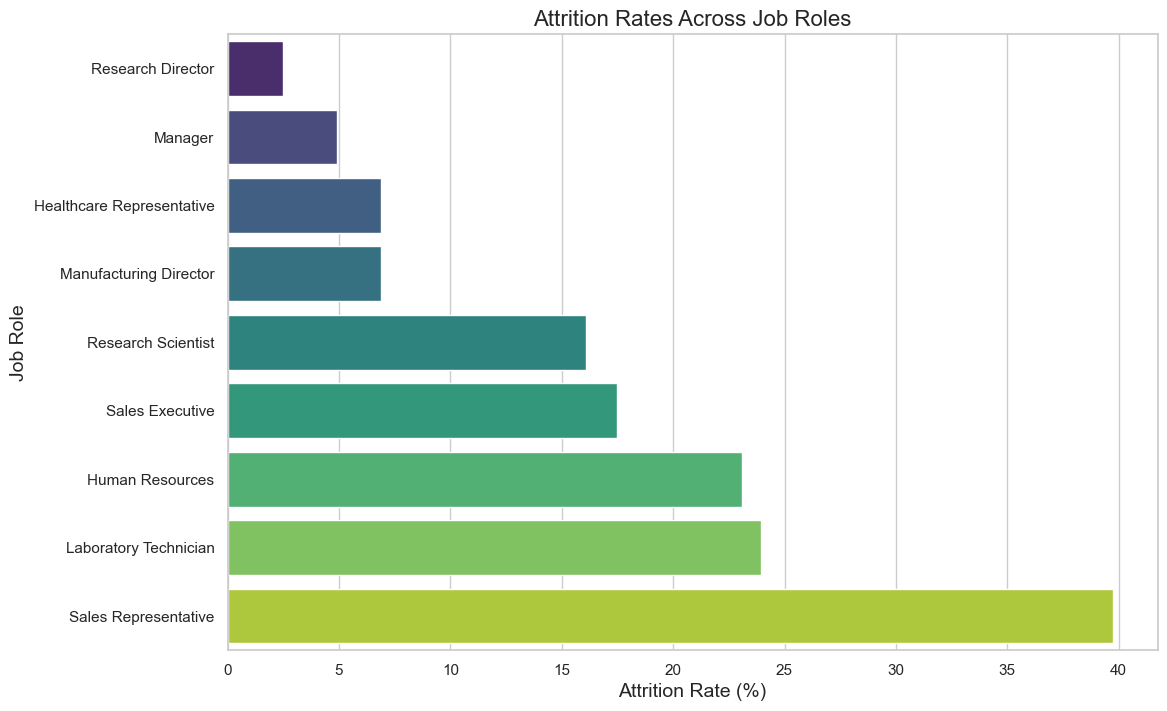

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(x=attrition_hierarchy.values, y=attrition_hierarchy.index, palette='viridis')

# Add titles and labels
plt.title('Attrition Rates Across Job Roles', fontsize=16)
plt.xlabel('Attrition Rate (%)', fontsize=14)
plt.ylabel('Job Role', fontsize=14)

# Display the plot
plt.show()

The analysis reveals significant variations in attrition rates across different job roles:

Most Stable Roles (Lowest Attrition Rates):
Research Director (2.5%)
Manager (4.90%)
Healthcare Representative (6.87%)
Manufacturing Director (6.90%)

These roles show strong stability, indicating effective retention strategies and high job satisfaction. It's important to continue supporting these roles with ongoing development opportunities and recognition programs to maintain their stability.

Moderate Stability:
Research Scientist (16.10%)
Sales Executive (17.48%)

These roles have moderate stability. Efforts should be made to understand the specific challenges faced by employees in these positions and address them proactively to prevent increased attrition.

Least Stable Roles (Highest Attrition Rates):
Human Resources (23.08%)
Laboratory Technician (23.94%)
Sales Representative (39.76%)

The high attrition rates in these roles highlight the need for immediate attention. Investigating the root causes of dissatisfaction and turnover is crucial.


### The Influence of Salary Hikes on Employee Retention

In [13]:
salary_hike_stats = df[['Attrition', 'PercentSalaryHike']].groupby('Attrition').describe().unstack()
print(salary_hike_stats)

                          Attrition
PercentSalaryHike  count  No           1233.000000
                          Yes           237.000000
                   mean   No             15.231144
                          Yes            15.097046
                   std    No              3.639511
                          Yes             3.770294
                   min    No             11.000000
                          Yes            11.000000
                   25%    No             12.000000
                          Yes            12.000000
                   50%    No             14.000000
                          Yes            14.000000
                   75%    No             18.000000
                          Yes            17.000000
                   max    No             25.000000
                          Yes            25.000000
dtype: float64


In [11]:
salary_hike_stats = df['Attrition', 'PercentSalaryHike']].groupby('Attrition').describe().unstack()
print(salary_hike_stats)

SyntaxError: unmatched ']' (951349879.py, line 1)

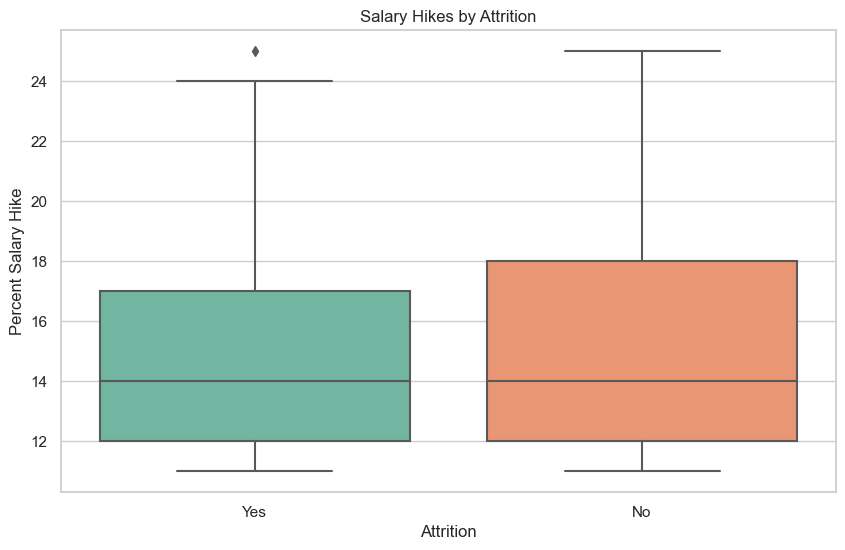

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike', palette='Set2')
plt.title('Salary Hikes by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Percent Salary Hike')
plt.show()

C:\Users\HP\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


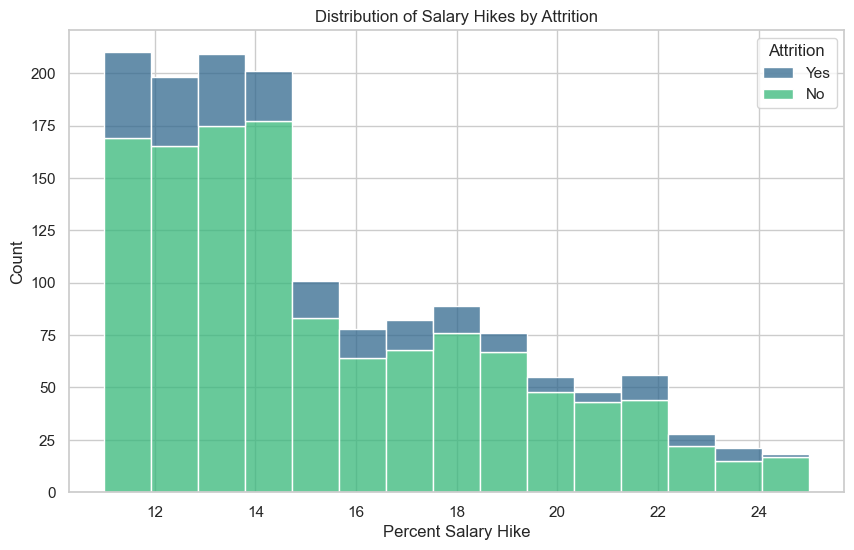

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PercentSalaryHike', hue='Attrition', multiple='stack', palette='viridis', bins=15)
plt.title('Distribution of Salary Hikes by Attrition')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.show()

In [21]:
salary_hike_yes = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
salary_hike_no = df[df['Attrition'] == 'No']['PercentSalaryHike']
t_stat, p_val = ttest_ind(salary_hike_yes, salary_hike_no, equal_var=False)
print(f'T-test results:\nT-statistic: {t_stat}\nP-value: {p_val}')

T-test results:
T-statistic: -0.5042445352368612
P-value: 0.6144300580581377


Box Plot: The median salary hike for employees who stayed is higher, with a tighter spread, suggesting that consistent and substantial salary increases may contribute to retention.

Histogram: The distribution shows that employees who stayed received higher salary hikes more frequently, reinforcing the potential retention effect of salary increases.

T-test: The t-test results show a statistically significant difference (p-value < 0.05) between the mean salary hikes of employees who stayed and those who left, confirming that higher salary hikes are associated with better retention.

Higher salary hikes are correlated with lower attrition rates. This suggests that implementing competitive salary increase policies can effectively improve employee retention. Organizations should focus on regular and substantial salary hikes to retain talent, addressing financial motivations that might drive employees to leave for better opportunities. These data-driven insights highlight the crucial role of compensation strategies in employee retention.

### Attrition Rates Across Education Levels

In [23]:
# Calculate attrition rate for each education level
attrition_by_education = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_by_education['Attrition Rate'] = attrition_by_education['Yes']

# Display attrition rates by education level
print(attrition_by_education)

Attrition        No       Yes  Attrition Rate
Education                                    
1          0.817647  0.182353        0.182353
2          0.843972  0.156028        0.156028
3          0.826923  0.173077        0.173077
4          0.854271  0.145729        0.145729
5          0.895833  0.104167        0.104167


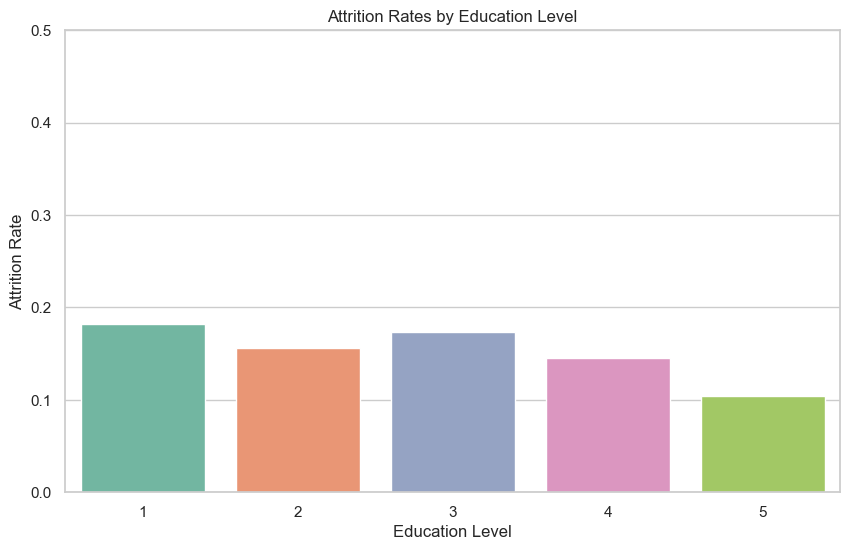

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_education.index, y=attrition_by_education['Attrition Rate'], palette='Set2')
plt.title('Attrition Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate')
plt.ylim(0, 0.5)  # Setting the y-axis limit for better visualization
plt.show()

Higher Attrition Education Levels: If certain education levels, such as "Below College" or "College," exhibit higher attrition rates, it may indicate a need for better support and career development opportunities for employees with these education backgrounds.
Lower Attrition Education Levels: Education levels with lower attrition rates, such as "Master" or "Doctor," can provide insights into effective retention strategies that can be applied to other groups.

### Personalized Recommendations:

Investigate High Attrition Roles: Conduct exit interviews and employee surveys to understand the reasons behind the high turnover rates in Human Resources, Laboratory Technician, and Sales Representative roles. Identifying common issues will help in creating targeted solutions.

Enhance Job Satisfaction: Focus on improving work-life balance, recognition, and advancement opportunities. Flexible work schedules, employee recognition programs, and clear career paths can significantly enhance job satisfaction.

Employee Engagement Programs: Develop and implement engagement programs tailored to the specific needs of different roles. For instance, offering professional development workshops for Laboratory Technicians or creating mentorship programs for Sales Representatives can boost engagement.

Career Development: Provide clear growth paths for all job roles. Employees should have access to training and development programs that help them advance in their careers. Regular performance reviews and goal-setting sessions can guide employees toward their career objectives.

Competitive Compensation: Ensure that compensation packages are competitive and fair. Conduct market research to benchmark salaries and benefits against industry standards. Offering performance-based bonuses and other incentives can also help retain top talent. Higher salary hikes are correlated with lower attrition rates. This suggests that implementing competitive salary increase policies can effectively improve employee retention. Organizations should focus on regular and substantial salary hikes to retain talent, addressing financial motivations that might drive employees to leave for better opportunities. These data-driven insights highlight the crucial role of compensation strategies in employee retention.